<a id="0"></a> <br>

# Contents
### 1. [Project Overview](#1)
### 2. [Preparing data for analysis](#2)
### 3. [Data Wrangling](#3)
### 4. [Exploratory Data Analysis (EDA)](#4)
* #### [Descriptive Statistics](#5)
* #### [Combining the Two Datasets for EDA](#6)
* #### [Getting insights](#7)

<a id="1"></a>
## Project Overview

### Context
The real estate sector, known for its intricacies and dynamic nature, holds significant interest for industry professionals, investors, policymakers, and data analysts seeking comprehensive insights into market dynamics and consumer behavior to make well-informed decisions. Our engagement involves conducting a Real Estate Market Analysis with Python for a prominent industry player that has accumulated extensive data on properties and clients.

### Objective
The primary goal of this project is to employ Python for preprocessing, analysis, and visualization of real estate property data. The objective is to derive meaningful insights into property transactions and customer profiles, providing valuable information for strategic decision-making.

<a id="2"></a>
## Preparing for analysis

#### Setting up the environnement

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

import statsmodels.api as sm
from scipy.stats import shapiro
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

### Loading the data

In [2]:
custumors = pd.read_csv("./project-files-real-estate-market-analysis-with-python/customers.csv")
properties = pd.read_csv("./project-files-real-estate-market-analysis-with-python/properties.csv")

<a id="3"></a>
## Data Wrangling

#### Check the data

In [3]:
custumors.head()

,Unnamed: 0,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [4]:
custumors.tail(5)

,Unnamed: 0,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
157,157,C0170,Individual,Emmy,Singh,12/3/1979,F,USA,Virginia,Investment,3,Yes,Agency
158,158,C0138,Individual,Colin,Campos,4/14/1942,M,USA,California,Home,3,No,Website
159,159,C0113,Individual,Anya,Stephenson,6/11/1959,F,USA,California,Home,4,No,Website
160,160,C0147,Individual,Parker,Poole,11/10/1951,M,USA,California,Home,5,No,Website
161,161,C0133,Individual,Ivan,Bright,9/15/1953,M,USA,California,Home,4,No,Website


In [5]:
custumors.shape

(162, 13)

In [6]:
properties.head()

,Unnamed: 0,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [7]:
properties.tail()

,Unnamed: 0,﻿id,building,date_sale,type,property#,area,price,status,customerid
262,262,5044,5,#NUM!,Apartment,44,1238.58,"$322,610.74",-,NaN
263,263,5047,5,#NUM!,Apartment,47,794.52,"$279,191.26",-,NaN
264,264,5048,5,#NUM!,Apartment,48,1013.27,"$287,996.53",-,NaN
265,265,5050,5,#NUM!,Apartment,50,1074.71,"$365,868.78",-,NaN
266,266,5051,5,#NUM!,Apartment,51,789.25,"$199,216.40",-,NaN


In [8]:
properties.shape

(267, 10)

As you can see both dataframes contain customerid column that contains IDs of customers. This ID is a string composed of a capital 'C' and a four digit number.
We can also observe that there are some missing data and some irrigularities in date_sale for example.

Both datasets have an additional column 'Unnamed: 0'. This column is auto-generated to get the index of columns. Since we don't need it (we can access index using pandas for example) so we can reset columns index using index_col=0 when reading the csv files.

In [9]:
custumors_df = pd.read_csv("./project-files-real-estate-market-analysis-with-python/customers.csv", index_col=0)
properties_df = pd.read_csv("./project-files-real-estate-market-analysis-with-python/properties.csv", index_col=0)

In [10]:
custumors_df.head()

,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [11]:
properties_df.head()

,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


To check missing data we can use the following function. For better practice let's also check data types

In [12]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (total/data.isnull().count()*100).round(2)
    missing_val_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    missing_val_df['Types'] = types
    return(np.transpose(missing_val_df))

In [13]:
missing_data(custumors_df)

,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
Total,0,0,0,0,7,7,0,8,0,0,0,0
Percent,0.0,0.0,0.0,0.0,4.32,4.32,0.0,4.94,0.0,0.0,0.0,0.0
Types,object,object,object,object,object,object,object,object,object,int64,object,object


In [14]:
missing_data(properties_df)

,﻿id,building,date_sale,type,property#,area,price,status,customerid
Total,0,0,0,0,0,0,0,0,72
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.97
Types,int64,int64,object,object,int64,float64,object,object,object


The customer dataset reveals missing data in the 'birth_date,' 'sex,' and 'status' columns, but notably, the absence of data in the 'customerid' column within the properties dataset is more critical. The ability to derive insights about customers hinges on this key variable. While it remains a hypothesis at this stage, our analysis will delve deeper to ascertain its validity. If confirmed, finding a resolution to this issue will be imperative for the integrity of our analysis.

Additionally, the 'price' variable is currently defined as an object rather than a numerical type, potentially affecting our analysis. To mitigate this impact, let's proceed to convert its format to a more appropriate one, such as a float.

In [15]:
properties_df['price'] = properties_df['price'].str.replace('[$,]','', regex=True).astype(float)

In [16]:
properties_df.head()

,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,11/1/2005,Apartment,30,743.09,246172.68,Sold,C0028
1,1029,1,10/1/2005,Apartment,29,756.21,246331.90,Sold,C0027
2,2002,2,7/1/2007,Apartment,2,587.28,209280.91,Sold,C0112
3,2031,2,12/1/2007,Apartment,31,1604.75,452667.01,Sold,C0160
4,1049,1,11/1/2004,Apartment,49,1375.45,467083.31,Sold,C0014


#### Data Preprocessing

In [17]:
# Convert some categorical data to numerical
custumors_df['mortgage'].replace({'Yes':1, 'No':0}, inplace=True)

# Parse dates
custumors_df['birth_date'] = custumors_df['birth_date'].apply(lambda x: pd.to_datetime(x, format="%m/%d/%Y").date() if x!="NA" else "NA")

# Rename some columns if needed
custumors_df.rename(columns={'\ufeffcustomerid':'customer_id'}, inplace=True)

In [18]:
custumors_df.head()

,customer_id,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,1968-05-11,F,USA,California,Home,4,1,Website
1,C0010,Individual,Trystan,Oconnor,1962-11-26,M,USA,California,Home,1,0,Website
2,C0132,Individual,Kale,Gay,1959-04-07,M,USA,California,Home,4,1,Agency
3,C0137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5,0,Website
4,C0174,Company,Marleez,Co,NaT,NaN,USA,California,Investment,5,0,Website


In [19]:
# Replace or delete unwanted data
to_replace = ['#NUM!', '-']

properties_df = properties_df.fillna('NA')
properties_df = properties_df.replace(to_replace, 'NA')

# Use same customer id column nma for both data sets for future join
properties_df.rename(columns={'customerid':'customer_id'}, inplace=True)

# Parse dates
properties_df['date_sale'] = properties_df['date_sale'].apply(lambda x: pd.to_datetime(x, format="%m/%d/%Y").date() if x!="NA" else "NA")

In [20]:
properties_df.head()

,﻿id,building,date_sale,type,property#,area,price,status,customer_id
0,1030,1,2005-11-01,Apartment,30,743.09,246172.68,Sold,C0028
1,1029,1,2005-10-01,Apartment,29,756.21,246331.90,Sold,C0027
2,2002,2,2007-07-01,Apartment,2,587.28,209280.91,Sold,C0112
3,2031,2,2007-12-01,Apartment,31,1604.75,452667.01,Sold,C0160
4,1049,1,2004-11-01,Apartment,49,1375.45,467083.31,Sold,C0014


<a id="4"></a>
## Exploratory Data Analysis (EDA)

<a id="5"></a>
### Descriptive statistics

In [21]:
custumors_df.describe()

,deal_satisfaction,mortgage
count,162.000000,162.000000
mean,3.456790,0.370370
std,1.333276,0.484401
min,1.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,1.000000
max,5.000000,1.000000


The 'deal_satisfaction' variable, based on 162 observations, exhibits a moderate level of variability around the mean satisfaction score of approximately 3.46. The dataset spans from a minimum satisfaction score of 1 to a maximum of 5, with a median score of 4, representing a balanced distribution. Notably, 25% of responses fall within the first quartile at a satisfaction score of 3 or lower, while 75% of responses, reaching the third quartile, have a satisfaction score of 5 or lower. These statistics offer valuable insights into the overall distribution and central tendency of deal satisfaction in the dataset.

In [22]:
properties_df.describe()

,﻿id,building,property#,area,price
count,267.000000,267.000000,267.000000,267.000000,267.000000
mean,2975.142322,2.947566,27.580524,936.221311,281171.901386
std,1392.197474,1.391794,15.361437,284.894858,89119.121005
min,1002.000000,1.000000,1.000000,410.710000,117564.070000
25%,2015.500000,2.000000,14.500000,756.210000,217553.055000
50%,3024.000000,3.000000,28.000000,798.280000,249075.660000
75%,4031.500000,4.000000,40.000000,1121.950000,326964.855000
max,5052.000000,5.000000,59.000000,1942.500000,538271.740000


### Quick observations :
The deal satisfaction for customers is above average (mean) which is promising 😁. Although, the minimun deal satisfaction is 1/5 so we could find out how to improve customer satisfaction to maximize our customer loyalty.

The standard deviation for area and price variables is large.

#### Area: 
The 'area' variable, reflecting property sizes, demonstrates a mean of 936.22 with a standard deviation of 284.89. Ranging from a minimum of 410.71 to a maximum of 1942.5, the dataset encompasses diverse property dimensions. The median area is 798.28, providing a central reference point.

#### Price:
Concerning 'price,' the dataset encapsulates a mean value of $281,171.90, coupled with a standard deviation of $89,119.12. With prices spanning from $117,564.07 to $538,271.74, the dataset vividly captures the spectrum of property values. The median price, serving as the central reference, stands at $249,075.66.

<a id="6"></a>
### Combining the Two Datasets for EDA

In [23]:
# Remove undesired spaces from text data
custumors_df = custumors_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [24]:
properties_df = properties_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [25]:
merged_df = pd.merge(custumors_df, properties_df, on='customer_id', how='outer')
merged_df.to_csv("../Projects/RealEstateMarketAnalysis/merged_df.csv")
merged_df.head(10)

,customer_id,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,﻿id,building,date_sale,type,property#,area,price,status
0,C0110,Individual,Kareem,Liu,1968-05-11,F,USA,California,Home,4.0,1.0,Website,4051,4,2007-03-01,Apartment,51,1608.84,496266.41,Sold
1,C0010,Individual,Trystan,Oconnor,1962-11-26,M,USA,California,Home,1.0,0.0,Website,1045,1,2004-10-01,Apartment,45,756.21,248525.12,Sold
2,C0132,Individual,Kale,Gay,1959-04-07,M,USA,California,Home,4.0,1.0,Agency,3036,3,2007-10-01,Apartment,36,1127.76,358525.59,Sold
3,C0137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5.0,0.0,Website,4010,4,2007-11-01,Apartment,10,794.52,223917.34,Sold
4,C0137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5.0,0.0,Website,4011,4,2007-11-01,Apartment,11,794.52,201518.89,Sold
5,C0174,Company,Marleez,Co,NaT,NaN,USA,California,Investment,5.0,0.0,Website,1013,1,2005-07-01,Apartment,13,756.21,206958.71,Sold
6,C0174,Company,Marleez,Co,NaT,NaN,USA,California,Investment,5.0,0.0,Website,1014,1,2005-07-01,Apartment,14,743.09,206445.42,Sold
7,C0174,Company,Marleez,Co,NaT,NaN,USA,California,Investment,5.0,0.0,Website,1019,1,2005-07-01,Apartment,19,827.87,239341.58,Sold
8,C0174,Company,Marleez,Co,NaT,NaN,USA,California,Investment,5.0,0.0,Website,1020,1,2005-07-01,Apartment,20,1160.36,398903.42,Sold
9,C0174,Company,Marleez,Co,NaT,NaN,USA,California,Investment,5.0,0.0,Website,1022,1,2005-07-01,Apartment,22,743.09,210745.17,Sold


<a id="7"></a>
### Getting insights

#### Area and Price distributions

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1500x500 with 0 Axes>

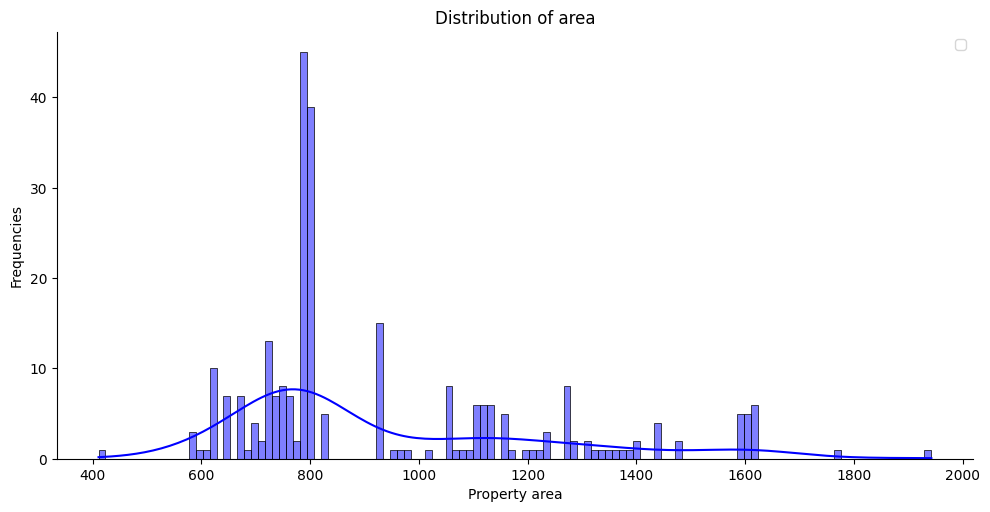

In [26]:
plt.figure(figsize=(15,5))
sns.displot(merged_df['area'], color='blue', kde=True,bins=120, height=5, aspect=2)
plt.title("Distribution of area")
plt.xlabel('Property area')
plt.ylabel('Frequencies')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1500x500 with 0 Axes>

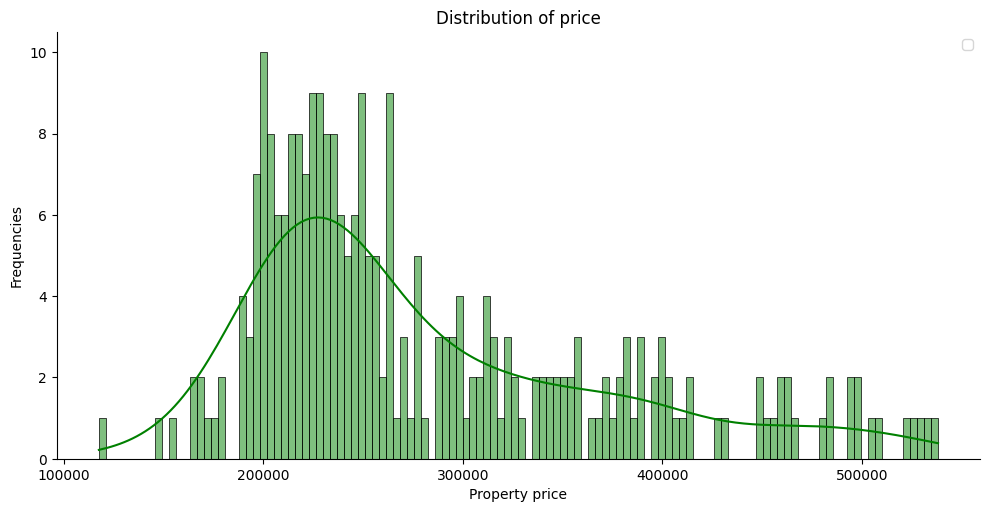

In [60]:
plt.figure(figsize=(15,5))
sns.displot(merged_df['price'], color='green', kde=True,bins=120, height=5, aspect=2)
plt.title("Distribution of price")
plt.xlabel('Property price')
plt.ylabel('Frequencies')
plt.legend()
plt.show()

Based on their distributions, we can admit that both area and price distributions are positively skewed. This confirms the fact that both distributions have a mean that is greater than the median.

#### Analyzing Building-specific Sales Performance through Conventional Methods

In [27]:
types = merged_df['type'].unique()
typelist = types.tolist()
print(typelist)

apartment_sales_df = merged_df[merged_df['type']=='Apartment']
apartment_sales = sum(apartment_sales_df['price'])
print("overall apartments sales: ", apartment_sales)

office_sales_df = merged_df[merged_df['type']=='Office']
office_sales = sum(office_sales_df['price'])
print("overall offices sales: ", office_sales)

['Apartment', 'Office']
overall apartments sales:  73082616.43000007
overall offices sales:  1990281.24


#### How many properties we have sold ?

In [28]:
properties_sold_df = merged_df[merged_df['status']=='Sold']
properties_sold_df['status'].explode().count()

195

#### Building Type Analysis: Examining Average Values for Deal Satisfaction, Area, and Price

In [29]:
averages_by_building = merged_df.groupby('type')[['deal_satisfaction','area','price']].mean().reset_index()
averages_by_building.rename(columns={'deal_satisfaction':'av_deal_satisfaction','area':'av_area','price':'av_price'}, inplace=True)
averages_by_building

,type,av_deal_satisfaction,av_area,av_price
0,Apartment,3.590426,939.327027,282172.264208
1,Office,3.857143,835.673750,248785.155000


Obviously, Appartments are doing better in sales than Offices.

#### Focus on buildings' categories

In [30]:
averages_per_building_type = merged_df.groupby('building')[['deal_satisfaction','area','price']].mean().reset_index()
averages_per_building_type.rename(columns={'deal_satisfaction':'av_deal_satisfaction','area':'av_area','price':'av_price'}, inplace=True)
averages_per_building_type

,building,av_deal_satisfaction,av_area,av_price
0,1,3.630435,928.038846,275143.242500
1,2,3.518519,943.891930,286661.848246
2,3,3.566038,927.852381,280451.255556
3,4,3.869565,974.720930,290239.515581
4,5,3.526316,914.298654,274557.604615


#### Which building that has the highest average property price ?

In [31]:
index_max_price = averages_per_building_type['av_price'].idxmax()
averages_per_building_type.loc[index_max_price]

building                     4.000000
av_deal_satisfaction         3.869565
av_area                    974.720930
av_price                290239.515581
Name: 3, dtype: float64

In [32]:
# Another way using iloc instead of loc
averages_per_building_type.iloc[averages_per_building_type['av_price'].idxmax(),:]

building                     4.000000
av_deal_satisfaction         3.869565
av_area                    974.720930
av_price                290239.515581
Name: 3, dtype: float64

In [33]:
# Same result by filtering by max price value
row_max_avprice = averages_per_building_type[averages_per_building_type['av_price']==averages_per_building_type['av_price'].max()]
row_max_avprice

,building,av_deal_satisfaction,av_area,av_price
3,4,3.869565,974.72093,290239.515581


#### Quick results

In [34]:
sales_per_building = merged_df.groupby('building')[['deal_satisfaction', 'area', 'price']]

In [35]:
sales_per_building.describe()

deal_satisfaction                                               area  \
                     count      mean       std  min  25%  50%  75%  max count   
building                                                                        
1                     46.0  3.630435  1.624243  1.0  2.0  5.0  5.0  5.0  52.0   
2                     54.0  3.518519  1.328082  1.0  3.0  4.0  5.0  5.0  57.0   
3                     53.0  3.566038  1.168652  1.0  3.0  4.0  5.0  5.0  63.0   
4                     23.0  3.869565  1.254242  1.0  3.0  4.0  5.0  5.0  43.0   
5                     19.0  3.526316  1.263523  1.0  2.5  4.0  4.5  5.0  52.0   

                      ...                     price                 \
                mean  ...        75%      max count           mean   
building              ...                                            
1         928.038846  ...  1160.3600  1942.50  52.0  275143.242500   
2         943.891930  ...  1109.2500  1615.29  57.0  286661.848246   
3         927.852381  ...  1127.7600  1596.35  63.0  280451.255556   
4         974.720930  ...  1121.9500  1611.85  43.0  290239.515581   
5         914.298654  ...  1058.0025  1769.48  52.0  274557.604615   

                                                                        \
                   std        min         25%         50%          75%   
building                                                                 
1         93237.843317  117564.07  208593.465  241983.225  320894.1150   
2         96503.315995  168834.04  217748.480  250773.150  326885.3400   
3         85792.973122  171262.65  213231.695  252185.990  332612.7750   
4         94619.611921  197053.51  227725.710  244820.670  333741.7250   
5         77450.988442  147343.69  226198.990  262433.080  317189.2675   

                     
                max  
building             
1         503790.23  
2         538271.74  
3         526947.16  
4         523373.45  
5         532877.38  

[5 rows x 24 columns]

As expected, the building 4 exhibits the highest mean values for both deal satisfaction (3.86) and price ($290,239.51).

#### Analyzing Sales Across Countries

In [36]:
sales_per_country_df = merged_df.groupby('country')[['deal_satisfaction', 'area', 'price']]

In [37]:
sales_per_country_df.describe()

deal_satisfaction                                                area  \
                    count      mean       std  min  25%  50%  75%  max  count   
country                                                                         
Belgium               2.0  3.000000  1.414214  2.0  2.5  3.0  3.5  4.0    2.0   
Canada                7.0  5.000000  0.000000  5.0  5.0  5.0  5.0  5.0    7.0   
Denmark               1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0    1.0   
Germany               1.0  5.000000       NaN  5.0  5.0  5.0  5.0  5.0    1.0   
Mexico                1.0  3.000000       NaN  3.0  3.0  3.0  3.0  3.0    1.0   
Russia                4.0  2.500000  1.000000  1.0  2.5  3.0  3.0  3.0    4.0   
UK                    2.0  4.000000  0.000000  4.0  4.0  4.0  4.0  4.0    2.0   
USA                 177.0  3.581921  1.337956  1.0  3.0  4.0  5.0  5.0  177.0   

                      ...                     price                 \
                mean  ...       75%      max  count           mean   
country               ...                                            
Belgium   852.730000  ...   887.970   923.21    2.0  229075.470000   
Canada    917.382857  ...   958.770  1615.29    7.0  274069.384286   
Denmark   785.480000  ...   785.480   785.48    1.0  257183.480000   
Germany   743.410000  ...   743.410   743.41    1.0  205098.210000   
Mexico   1283.450000  ...  1283.450  1283.45    1.0  338181.180000   
Russia    903.757500  ...   940.340   977.87    4.0  278828.835000   
UK        739.480000  ...   760.275   781.07    2.0  220142.680000   
USA       900.794463  ...  1109.250  1942.50  177.0  270096.266554   

                                                                      \
                   std        min         25%        50%         75%   
country                                                                
Belgium   19325.497030  215410.28  222242.875  229075.47  235908.065   
Canada   109124.769351  177555.06  207808.920  236608.95  302122.905   
Denmark            NaN  257183.48  257183.480  257183.48  257183.480   
Germany            NaN  205098.21  205098.210  205098.21  205098.210   
Mexico             NaN  338181.18  338181.180  338181.18  338181.180   
Russia    30065.623487  248274.31  258253.495  275653.94  296229.280   
UK         8768.293792  213942.56  217042.620  220142.68  223242.740   
USA       80949.111595  117564.07  210824.060  243052.59  310223.290   

                    
               max  
country             
Belgium  242740.66  
Canada   484458.03  
Denmark  257183.48  
Germany  205098.21  
Mexico   338181.18  
Russia   315733.15  
UK       226342.80  
USA      529317.28  

[8 rows x 24 columns]

Having the hoghest number of properties in USA, the company made more sales in this region. The average customer satisafction still above average but could be improved (using marketing compaigns for example, but segments must be defined using specific models).

### Focus on USA

In [38]:
# First filter on USA data
USA_df = merged_df[merged_df['country']=='USA']

# States sales DF
states_sales_df = USA_df.groupby(['state'])[['deal_satisfaction', 'area', 'price']]

In [39]:
states_sales_df.describe()

deal_satisfaction                                               \
                       count      mean       std  min  25%  50%  75%  max   
state                                                                       
Arizona                  9.0  3.222222  1.201850  1.0  3.0  3.0  4.0  5.0   
California             118.0  3.737288  1.355129  1.0  3.0  4.0  5.0  5.0   
Colorado                11.0  3.181818  1.078720  2.0  2.0  3.0  4.0  5.0   
Kansas                   1.0  3.000000       NaN  3.0  3.0  3.0  3.0  3.0   
Nevada                  17.0  3.235294  1.347656  1.0  2.0  3.0  5.0  5.0   
Oregon                  11.0  3.090909  1.375103  1.0  2.0  3.0  4.0  5.0   
Utah                     5.0  3.200000  1.643168  1.0  2.0  4.0  4.0  5.0   
Virginia                 4.0  4.500000  1.000000  3.0  4.5  5.0  5.0  5.0   
Wyoming                  1.0  3.000000       NaN  3.0  3.0  3.0  3.0  3.0   

             area              ...                      price                 \
            count        mean  ...        75%      max  count           mean   
state                          ...                                             
Arizona       9.0  848.533333  ...   923.2100  1127.76    9.0  265079.216667   
California  118.0  936.684492  ...  1126.3075  1942.50  118.0  279852.950763   
Colorado     11.0  777.010909  ...   766.4900  1109.25   11.0  233662.461818   
Kansas        1.0  923.210000  ...   923.2100   923.21    1.0  252185.990000   
Nevada       17.0  921.692941  ...  1093.0000  1434.09   17.0  277649.329412   
Oregon       11.0  766.954545  ...   783.2750  1160.36   11.0  236593.322727   
Utah          5.0  814.986000  ...   756.2100  1305.62    5.0  237755.280000   
Virginia      4.0  730.712500  ...   785.3175   794.52    4.0  215144.187500   
Wyoming       1.0  701.660000  ...   701.6600   701.66    1.0  204286.670000   

                                                                          \
                     std        min          25%        50%          75%   
state                                                                      
Arizona     34237.999726  193660.62  253025.7800  261742.74  293876.2700   
California  89279.400959  117564.07  216674.0625  246111.54  330087.4950   
Colorado    51360.162071  188743.11  198053.8550  212265.67  244993.9950   
Kansas               NaN  252185.99  252185.9900  252185.99  252185.9900   
Nevada      67677.698500  198841.70  222947.2100  249591.99  317196.4000   
Oregon      36461.364875  195153.16  212727.8700  224463.87  253545.6350   
Utah        95428.370996  153466.71  200300.6300  214341.34  218585.9200   
Virginia    14154.706233  203491.85  207571.0700  210725.82  218298.9375   
Wyoming              NaN  204286.67  204286.6700  204286.67  204286.6700   

                       
                  max  
state                  
Arizona     310831.21  
California  529317.28  
Colorado    344568.74  
Kansas      252185.99  
Nevada      412856.56  
Oregon      317473.86  
Utah        402081.80  
Virginia    235633.26  
Wyoming     204286.67  

[9 rows x 24 columns]

In [40]:
total_sales_usa = USA_df.groupby('state')['price'].sum()
total_sales_usa

state
Arizona        2385712.95
California    33022648.19
Colorado       2570287.08
Kansas          252185.99
Nevada         4720038.60
Oregon         2602526.55
Utah           1188776.40
Virginia        860576.75
Wyoming         204286.67
Name: price, dtype: float64

Evidently, California leads in state sales, boasting a total revenue of $33,022,648.19. Following closely is Nevada with total sales amounting to $4,720,038.60, and securing the third position is Oregon with total sales reaching $2,602,526.55.

#### Real Estate Sales Across States

In [41]:
sales_per_state = USA_df[USA_df['status']=='Sold']
sales_per_state.groupby('state')['type'].value_counts()

state       type     
Arizona     Apartment      8
            Office         1
California  Apartment    115
            Office         3
Colorado    Apartment     11
Kansas      Apartment      1
Nevada      Apartment     14
            Office         3
Oregon      Apartment     11
Utah        Apartment      5
Virginia    Apartment      4
Wyoming     Apartment      1
Name: count, dtype: int64

#### States frequencies (relative and cumulative)

Frequency Distribution by State:
        state  frequency  relative_frequency  cumulative_frequency
0  California        120            0.662983              0.662983
1      Nevada         17            0.093923              0.756906
2      Oregon         11            0.060773              0.817680
3     Arizona         11            0.060773              0.878453
4    Colorado         11            0.060773              0.939227
5        Utah          5            0.027624              0.966851
6    Virginia          4            0.022099              0.988950
7     Wyoming          1            0.005525              0.994475
8      Kansas          1            0.005525              1.000000


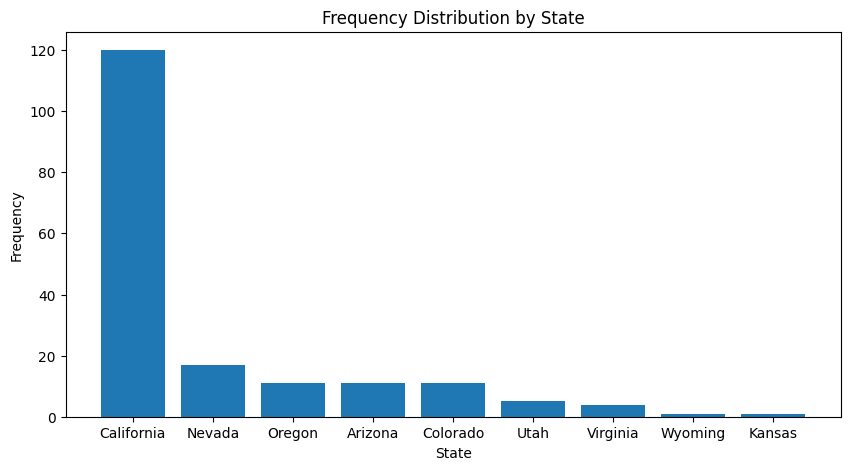

In [42]:
# Replace 'state' with the actual column name representing states
state_frequency = merged_df['state'].value_counts().reset_index()
state_frequency.columns = ['state', 'frequency']

# Define relative and cumulative frequencies
state_frequency['relative_frequency'] = state_frequency['frequency'] / state_frequency['frequency'].sum()
state_frequency['cumulative_frequency'] = state_frequency['relative_frequency'].cumsum()

# Display frequency distribution by state
print("Frequency Distribution by State:")
print(state_frequency)

# Visualize the distribution
plt.figure(figsize=(10,5))
plt.bar(state_frequency['state'], state_frequency['frequency'])
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Frequency Distribution by State')
plt.show()

#### Quick result

<Axes: xlabel='state', ylabel='count'>

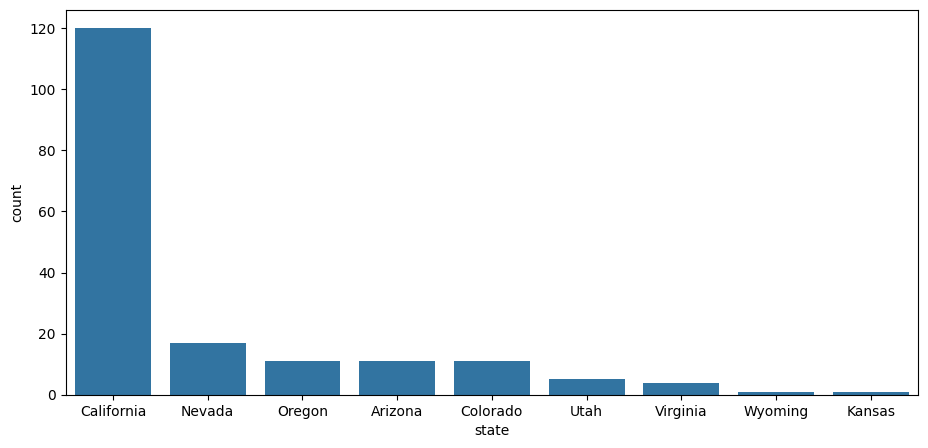

In [43]:
states_freq = merged_df['state'].value_counts()

plt.figure(figsize=(11, 5))
sns.barplot(states_freq)

#### Now let's uncover other insights based on other data such as customers age

In [44]:
merged_df['date_sale'].dtype

dtype('O')

We will be using date_sale to calculate customers' age at data of sale but this variable is not a datetime variable and must be formatted.

In [45]:
# Parse dates in date_sale column
merged_df['date_sale'] = merged_df['date_sale'].apply(lambda x: pd.to_datetime(x, format="%m/%d/%Y").date() if x!="NA" else pd.NaT)

#### Now we will define segments by grouping sales per age intervals that we will define

In [46]:
# Create a new column age of customers
current_datetime = pd.to_datetime('today')
thisyear = current_datetime.year

merged_df['age_at_sale_time'] = pd.to_datetime(merged_df['date_sale']).dt.year - pd.to_datetime(merged_df['birth_date']).dt.year

age_bins = [19, 25, 31, 37, 43, 49, 55, 61, 67, 73, 79]

age_intervals = [f"{start}-{end}" for start, end in zip(age_bins, age_bins[1:])]

# Add column for ages intervals
merged_df['age_interval'] = pd.cut(merged_df['age_at_sale_time'], bins=age_bins,labels=age_intervals, right=False)

In [47]:
properties_sold_per_age_interval = merged_df.groupby('age_interval')['property#'].sum()
print("Number of type of buildings sold per age interval\n", properties_sold_per_age_interval)

Number of type of buildings sold per age interval
 age_interval
19-25     92
25-31    526
31-37    745
37-43    959
43-49    861
49-55    548
55-61    700
61-67    284
67-73    187
73-79    109
Name: property#, dtype: int64


#### Following the same logic we define price ranges

In [48]:
max_price = merged_df['price'].max()
min_price = merged_df['price'].min()
interval_number = 10
step = (max_price-min_price)/(interval_number)
price_bins = [i for i in np.arange(min_price, max_price+1, step)]
price_intervals = [f"{start}-{end}" for start, end in zip(price_bins, price_bins[1:])]

price_intervals

['117564.07-159634.837',
 '159634.837-201705.604',
 '201705.604-243776.37099999998',
 '243776.37099999998-285847.138',
 '285847.138-327917.90499999997',
 '327917.90499999997-369988.67199999996',
 '369988.67199999996-412059.43899999995',
 '412059.43899999995-454130.20599999995',
 '454130.20599999995-496200.97299999994',
 '496200.97299999994-538271.74']

In [49]:
merged_df['price_interval'] = pd.cut(merged_df['price'], bins=price_bins,labels=price_intervals,right=True)
merged_df.head()

,customer_id,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,...,building,date_sale,type,property#,area,price,status,age_at_sale_time,age_interval,price_interval
0,C0110,Individual,Kareem,Liu,1968-05-11,F,USA,California,Home,4.0,...,4,2007-03-01,Apartment,51,1608.84,496266.41,Sold,39.0,37-43,496200.97299999994-538271.74
1,C0010,Individual,Trystan,Oconnor,1962-11-26,M,USA,California,Home,1.0,...,1,2004-10-01,Apartment,45,756.21,248525.12,Sold,42.0,37-43,243776.37099999998-285847.138
2,C0132,Individual,Kale,Gay,1959-04-07,M,USA,California,Home,4.0,...,3,2007-10-01,Apartment,36,1127.76,358525.59,Sold,48.0,43-49,327917.90499999997-369988.67199999996
3,C0137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5.0,...,4,2007-11-01,Apartment,10,794.52,223917.34,Sold,48.0,43-49,201705.604-243776.37099999998
4,C0137,Individual,Russell,Gross,1959-11-25,M,USA,California,Home,5.0,...,4,2007-11-01,Apartment,11,794.52,201518.89,Sold,48.0,43-49,159634.837-201705.604


#### How many unsold properties are there in the last interval $496,201–$538,272 ?

In [50]:
merged_df['status'].replace({'NA':'Unsold'}, inplace=True)

In [51]:
unsold_properties = merged_df[merged_df['status']=='Unsold']
unsold_properties.groupby('price_interval')['status'].count()

price_interval
117564.07-159634.837                      1
159634.837-201705.604                     4
201705.604-243776.37099999998            20
243776.37099999998-285847.138            13
285847.138-327917.90499999997             7
327917.90499999997-369988.67199999996     6
369988.67199999996-412059.43899999995     8
412059.43899999995-454130.20599999995     3
454130.20599999995-496200.97299999994     4
496200.97299999994-538271.74              6
Name: status, dtype: int64

#### Building that has the highest sales in 2004

In [52]:
merged_df['year_sale'] = pd.to_datetime(merged_df['date_sale']).dt.year
sales_2004 = merged_df[merged_df['year_sale']==2004]
sales_2004.groupby('building')['price'].max().reset_index()

,building,price
0,1,467083.31
1,2,169158.29


#### Year with the Highest Revenue

In [53]:
highest_year_sales = merged_df.groupby('year_sale')['price'].sum()
index_highest_sales = highest_year_sales.idxmax()
print(f"Highest sales was acheived in {int(index_highest_sales)} with a total of ${highest_year_sales[index_highest_sales]}")

Highest sales was acheived in 2007 with a total of $27451798.34


#### Visualizing Annual Sales Distribution by Building through Stacked Chart

In [54]:
# What colors can we use for plots in matplotlib?
color_names = list(colors.cnames)
print(color_names)

['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 

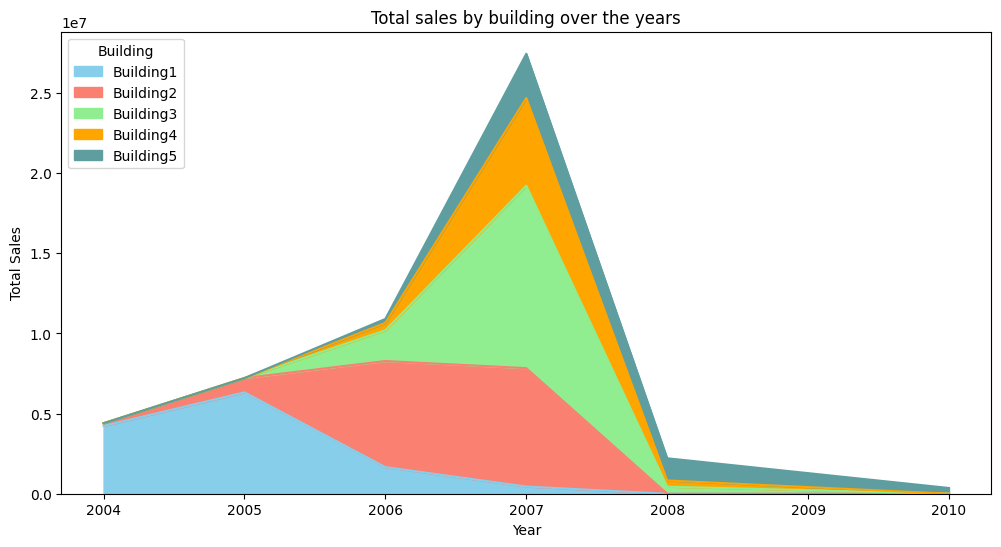

In [55]:
merged_df['building'].replace({1:'Building1', 2:'Building2', 3:'Building3', 4:'Building4', 5:'Building5'}, inplace=True)

total_per_building_per_year = merged_df.groupby(['building','year_sale'])['price'].value_counts().reset_index()

colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple']

# Group by 'building' and 'sales_year' and sum the 'price' column
total_sales_per_building_per_year = merged_df.groupby(['building', 'year_sale'])['price'].sum().reset_index()

# Pivot the DataFrame to have 'building' as columns
pivot_df = total_sales_per_building_per_year.pivot(index='year_sale', columns='building', values='price').fillna(0)

# Plot stacked area chart
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'cadetblue']
pivot_df.plot(kind='area', stacked=True, color=colors, figsize=(12, 6))

plt.title('Total sales by building over the years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Building', loc='upper left')
plt.show()

#### Exploring the Correlation Between Customer Age and Property Price

Correlation Coefficient: -0.17344118592365831


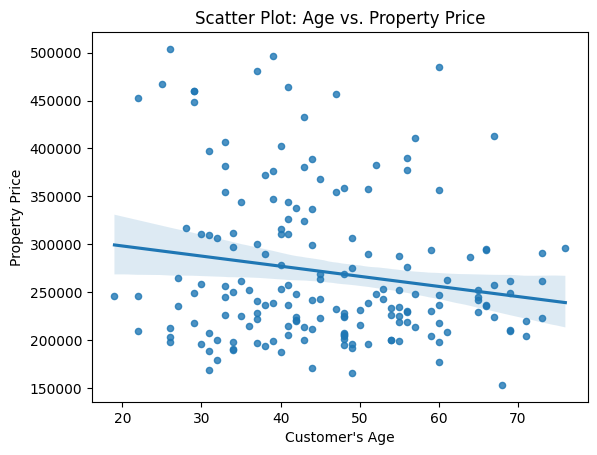

In [56]:
# sns.scatterplot(x='age_at_sale_time', y='price', data=merged_df)
sns.regplot(x='age_at_sale_time', y='price', data=merged_df, scatter_kws={'s': 20}) 
plt.title('Scatter Plot: Age vs. Property Price')
plt.xlabel("Customer's Age")
plt.ylabel('Property Price')

# Calculate the correlation coefficient
correlation_coefficient = merged_df['price'].corr(merged_df['age_at_sale_time'])
print(f'Correlation Coefficient: {correlation_coefficient}')

# Show the plot
plt.show()

#### Analyzing the Distribution of Customer Age: A Histogram Presentation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


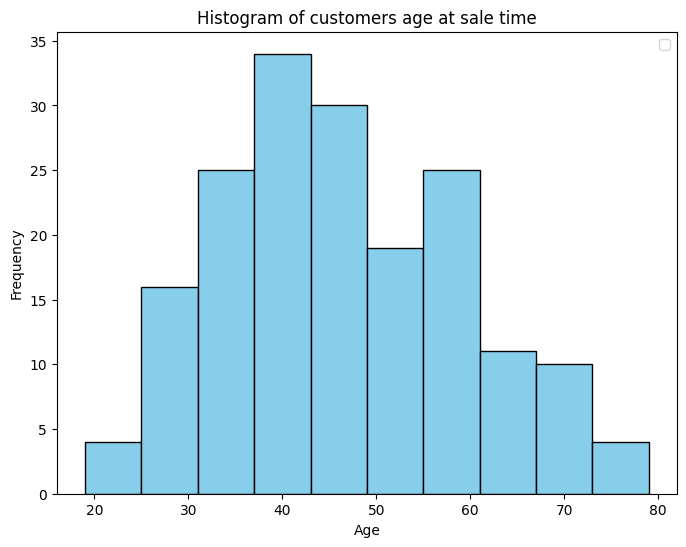

In [57]:
np.histogram(merged_df['age_at_sale_time'],bins=age_bins)
plt.figure(figsize=(8,6))
plt.hist(merged_df['age_at_sale_time'],bins=age_bins, color='skyblue',edgecolor='black')
plt.title("Histogram of customers age at sale time")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#### Analyzing the Distribution Type

To avoid any ambiguity when trying to determine the type of a distribution we can use some vizualization methods such as kdeplot, (Q-Q) Plot and Shapiro-Wilk test.

##### 1. Kernel Density Estimate

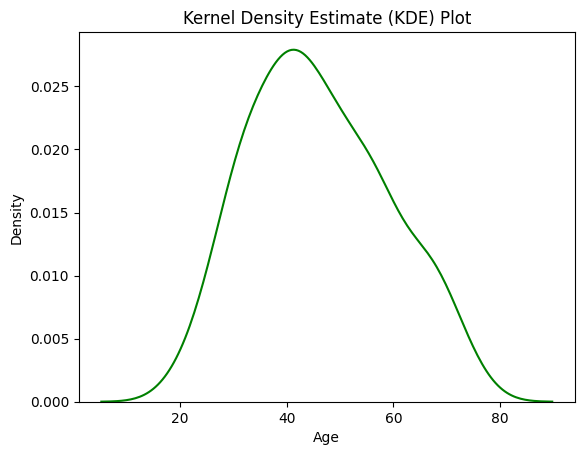

In [58]:
sns.kdeplot(merged_df['age_at_sale_time'], color='green')
plt.title('Kernel Density Estimate (KDE) Plot')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

#### 2. Quantile-Quantile (Q-Q) Plot

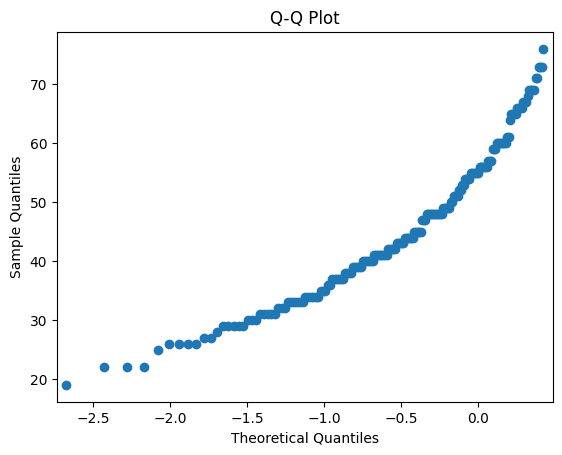

In [59]:
sm.qqplot(merged_df['age_at_sale_time'], line='s')
plt.title('Q-Q Plot')
plt.show()

Deviations from a straight line may indicate departures from normality

### Shapiro-Wilk Test

In [60]:
stat, p_value = shapiro(merged_df['age_at_sale_time'])
print(f'Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}')

Shapiro-Wilk Test Statistic: nan, p-value: 1.0


A p-value of 1.0 indicates that there is no statistical evidence to reject the null hypothesis. In hypothesis testing, the p-value is the probability of observing a test statistic (or more extreme) if the null hypothesis is true.

#### Conclusion : our customers age distribution diverges from normality (Q-Q plot) and the KDE shows that it's a positively skewed distribution.